# Predicciones de ventas
## Cargando datos e importando pandas

In [1]:
import pandas as pd
filename='/Users/matiasinostrozacifuentes/Desktop/solutions/predicciones-ventas/Data/sales_predictions.csv'
predicciones_df= pd.read_csv(filename)

primeras impresiones del data

In [2]:
predicciones_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
predicciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Existen dos columnas que tienen datos faltantes:
* Item_Weight tiene 1463 NaN
* Outlet_Size tiene 2410 NaN

In [4]:
predicciones_df.loc[ predicciones_df['Item_Weight'].isna(), :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Ordenando el dataset por identificador

In [5]:
predicciones_df=predicciones_df.sort_values(by=['Item_Identifier','Item_Weight'])
predicciones_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [6]:
predicciones_df.loc[predicciones_df['Item_Identifier']=="DRK37", :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
599,DRK37,5.0,Low Fat,0.044005,Soft Drinks,188.853,OUT046,1997,Small,Tier 1,Supermarket Type1,5502.837
3687,DRK37,5.0,Low Fat,0.000000,Soft Drinks,189.853,OUT045,2002,NaN,Tier 2,Supermarket Type1,4933.578
7568,DRK37,5.0,LF,0.000000,Soft Drinks,190.453,OUT010,1998,NaN,Tier 3,Grocery Store,379.506
1046,DRK37,NaN,Low Fat,0.077047,Soft Drinks,189.453,OUT019,1985,Small,Tier 1,Grocery Store,759.012
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.053,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.849


In [7]:
predicciones_df_sort=predicciones_df

Cantidad de identificadores unicos

In [8]:
predicciones_df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

Reasignando la columna Item Weight con valores 

In [9]:
predicciones_df_sort['Item_Weight']=predicciones_df_sort.loc[:,'Item_Weight'].fillna(method='ffill')
predicciones_df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 118 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [10]:
predicciones_df.loc[predicciones_df['Item_Identifier']=="FDP10", :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [11]:
predicciones_df_sort.groupby(['Item_Identifier','Item_Weight'],).count()

,,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Item_Weight,,,,,,,,,,
DRA12,11.600,6,6,6,6,6,6,3,6,6,6
DRA24,19.350,7,7,7,7,7,7,5,7,7,7
DRA59,8.270,8,8,8,8,8,8,6,8,8,8
DRB01,7.390,3,3,3,3,3,3,3,3,3,3
DRB13,6.115,5,5,5,5,5,5,3,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
NCZ30,6.590,7,7,7,7,7,7,4,7,7,7
NCZ41,19.850,5,5,5,5,5,5,3,5,5,5
NCZ42,10.500,5,5,5,5,5,5,3,5,5,5


---
Ocupando la misma manera que en la parte de arriba, se ordenará el dataset por el ID de cada tienda y con esto se podrá saber los datos faltantes para cada tipo de tienda

In [12]:
predicciones_df=predicciones_df.sort_values(by=['Outlet_Identifier','Outlet_Size'])
predicciones_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.600,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
4130,DRA24,19.350,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
8371,DRA59,8.270,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,NaN,Tier 3,Grocery Store,185.0924
2479,DRB13,6.115,Regular,0.011791,Soft Drinks,189.0530,OUT010,1998,NaN,Tier 3,Grocery Store,948.7650
8063,DRB25,12.300,Low Fat,0.116261,Soft Drinks,107.0938,OUT010,1998,NaN,Tier 3,Grocery Store,214.3876
...,...,...,...,...,...,...,...,...,...,...,...,...
74,NCZ18,7.825,low fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
4418,NCZ30,6.590,Low Fat,0.026226,Household,119.0098,OUT049,1999,Medium,Tier 1,Supermarket Type1,2530.7058
6488,NCZ42,10.500,LF,0.011305,Household,235.5248,OUT049,1999,Medium,Tier 1,Supermarket Type1,4740.4960
6879,NCZ53,9.600,Low Fat,0.024515,Health and Hygiene,189.2214,OUT049,1999,Medium,Tier 1,Supermarket Type1,3956.8494


In [13]:
predicciones_df.loc[predicciones_df['Outlet_Identifier']=="OUT010", :].nunique()

Item_Identifier              555
Item_Weight                  248
Item_Fat_Content               5
Item_Visibility              521
Item_Type                     16
Item_MRP                     548
Outlet_Identifier              1
Outlet_Establishment_Year      1
Outlet_Size                    0
Outlet_Location_Type           1
Outlet_Type                    1
Item_Outlet_Sales            391
dtype: int64

El metodo no funcionó debido a que toda una tienda no entregó sus valores de tamaño, por ende no es factible realizar el mismo metodo que en el anterior

Separando la columna Outlet_size por dummies

In [14]:
dummie=pd.get_dummies(data=predicciones_df_sort, columns = ["Outlet_Size"])
dummie.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Tier 2,Supermarket Type1,2552.6772,0,0,0
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Tier 2,Supermarket Type1,3829.0158,0,0,0
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,Tier 3,Supermarket Type1,2552.6772,1,0,0
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Tier 2,Supermarket Type1,992.7078,0,0,1
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Tier 3,Supermarket Type2,850.8924,0,1,0


identificando los NaN de los Outlet_Size

In [15]:
#La cantidad que más se repite por Outlet_size
dummie[['Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small']].sum()

Outlet_Size_High       932
Outlet_Size_Medium    2793
Outlet_Size_Small     2388
dtype: int64

In [16]:
dummie.groupby(['Item_Identifier'])[['Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small']].sum()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
Item_Identifier,,,
DRA12,1,1,1
DRA24,1,2,2
DRA59,1,3,2
DRB01,1,2,0
DRB13,1,1,1
...,...,...,...
NCZ30,1,2,1
NCZ41,1,1,1
NCZ42,1,1,1


In [17]:
dummie.loc[(dummie['Outlet_Size_High']==0)&(dummie['Outlet_Size_Medium']==0)&(dummie['Outlet_Size_Small']==0)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Tier 2,Supermarket Type1,2552.6772,0,0,0
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Tier 2,Supermarket Type1,3829.0158,0,0,0
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Tier 3,Grocery Store,283.6308,0,0,0
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,Tier 2,Supermarket Type1,1146.5076,0,0,0
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Tier 3,Grocery Store,327.5736,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,NCZ42,10.50,Low Fat,0.000000,Household,238.3248,OUT010,1998,Tier 3,Grocery Store,711.0744,0,0,0
1115,NCZ42,10.50,Low Fat,0.011352,Household,236.5248,OUT017,2007,Tier 2,Supermarket Type1,4029.4216,0,0,0
4924,NCZ53,9.60,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,Tier 3,Grocery Store,376.8428,0,0,0
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Tier 3,Grocery Store,324.9104,0,0,0


Aquí tomé la decisión de eliminar el resto de los NaN porque es dificil determinar con presición cual puede ser el tipo de tienda

In [18]:
predicciones_without_nan=predicciones_df_sort.loc[:,:].dropna(how="any")
predicciones_without_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


Algunos resumenes Estadisticos

In [19]:
predicciones_without_nan.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.912292,0.064505,141.256859,1995.794373,2322.688445
std,4.668038,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,8.785000,0.026681,94.012000,1987.000000,974.731200
50%,12.650000,0.052811,143.178600,1997.000000,1928.156800
75%,17.000000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


---
Ahora realizando algunas visualizaciones de productos para ver que tal están 

In [30]:
import matplotlib.pyplot as plt
from numpy.random import randn

In [31]:
mean_vis=0.064505
desv_vis=0.050092
x=mean_vis+desv_vis*randn(6113)
num_bins=10


In [69]:
Ventas_porlocal=predicciones_without_nan.groupby('Outlet_Type')['Item_Outlet_Sales'].count()
Ventas_porlocal.index

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')

### First visualization with matplotlib

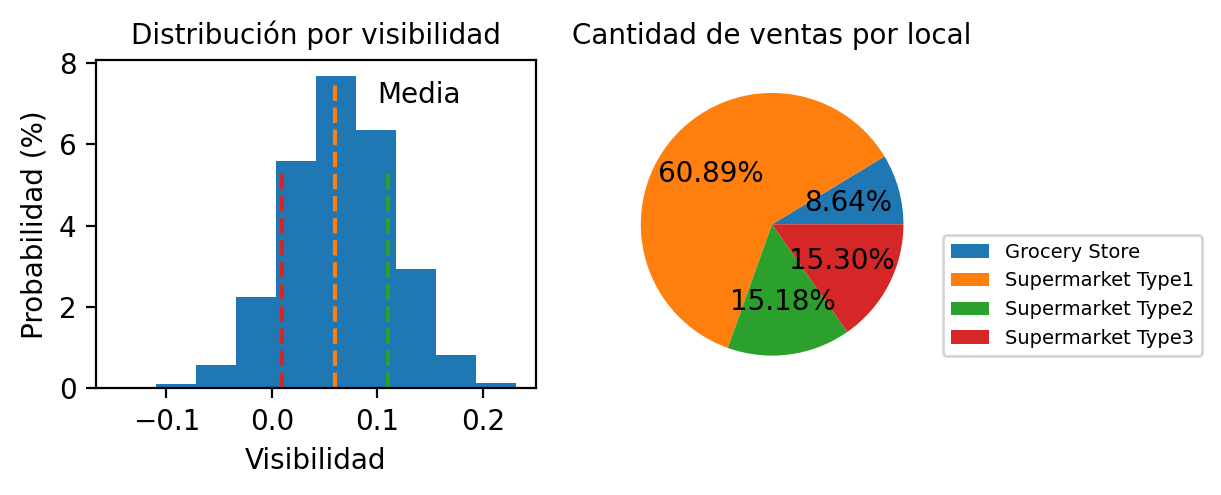

In [100]:
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
ax1 = fig.add_subplot(2,2,1)
ax1.hist(x,num_bins,density=True)
ax1.set_xlabel('Visibilidad')
ax1.set_ylabel('Probabilidad (%)')
ax1.plot([0.06,0.06],[0,7.5],'--')
ax1.plot([0.06+desv_vis,0.06+desv_vis],[0,5.4],"--")
ax1.plot([0.06-desv_vis,0.06-desv_vis],[0,5.4],"--")
ax1.annotate('Media', xy=(0.06,7.5), xytext=(0.1,7))
ax1.set_title('Distribución por visibilidad',fontsize=10)


ax2=fig.add_subplot(2,2,2)
ax2.pie(Ventas_porlocal.values,autopct="%.2f%%")
ax2.legend(Ventas_porlocal.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Cantidad de ventas por local',fontsize=10)
plt.rcParams['figure.constrained_layout.use'] = True




### Installation of cyberpunk with a visualization

In [101]:
!pip install mplcyberpunk

In [102]:
import mplcyberpunk


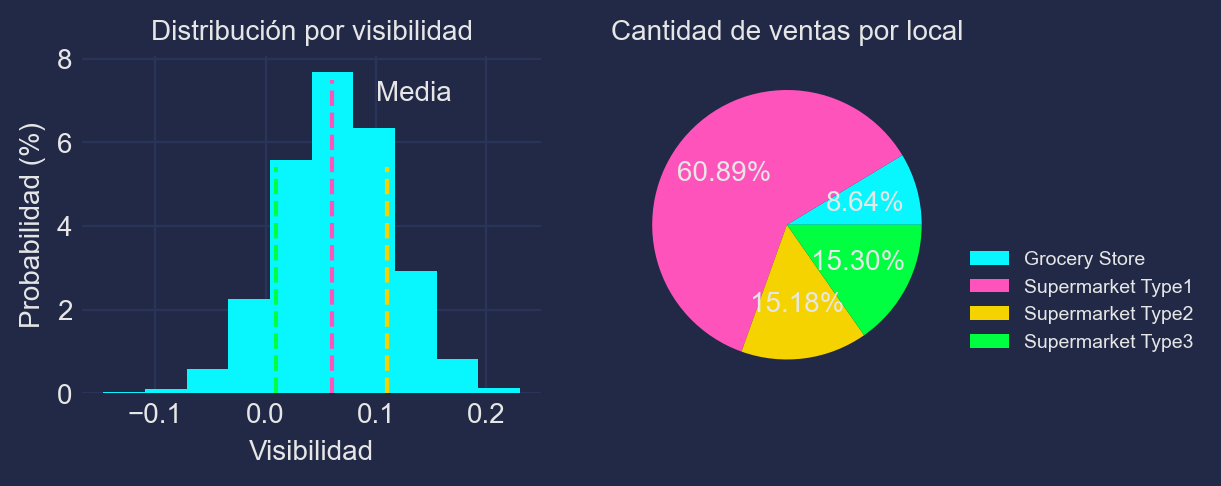

In [105]:
fig = plt.figure(dpi=200)
plt.style.use('cyberpunk')
 #para ajustar los gráficos
ax1 = fig.add_subplot(2,2,1)
ax1.hist(x,num_bins,density=True)
ax1.set_xlabel('Visibilidad')
ax1.set_ylabel('Probabilidad (%)')
ax1.plot([0.06,0.06],[0,7.5],'--')
ax1.plot([0.06+desv_vis,0.06+desv_vis],[0,5.4],"--")
ax1.plot([0.06-desv_vis,0.06-desv_vis],[0,5.4],"--")
ax1.annotate('Media', xy=(0.06,7.5), xytext=(0.1,7))
ax1.set_title('Distribución por visibilidad',fontsize=10)


ax2=fig.add_subplot(2,2,2)
ax2.pie(Ventas_porlocal.values,autopct="%.2f%%")
ax2.legend(Ventas_porlocal.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Cantidad de ventas por local',fontsize=10)
plt.rcParams['figure.constrained_layout.use'] = True

#mplcyberpunk.add_glow_effects()


### Creating graphs and viewing the data with seaborn

In [106]:
import seaborn as sns

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1189/2569146433.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


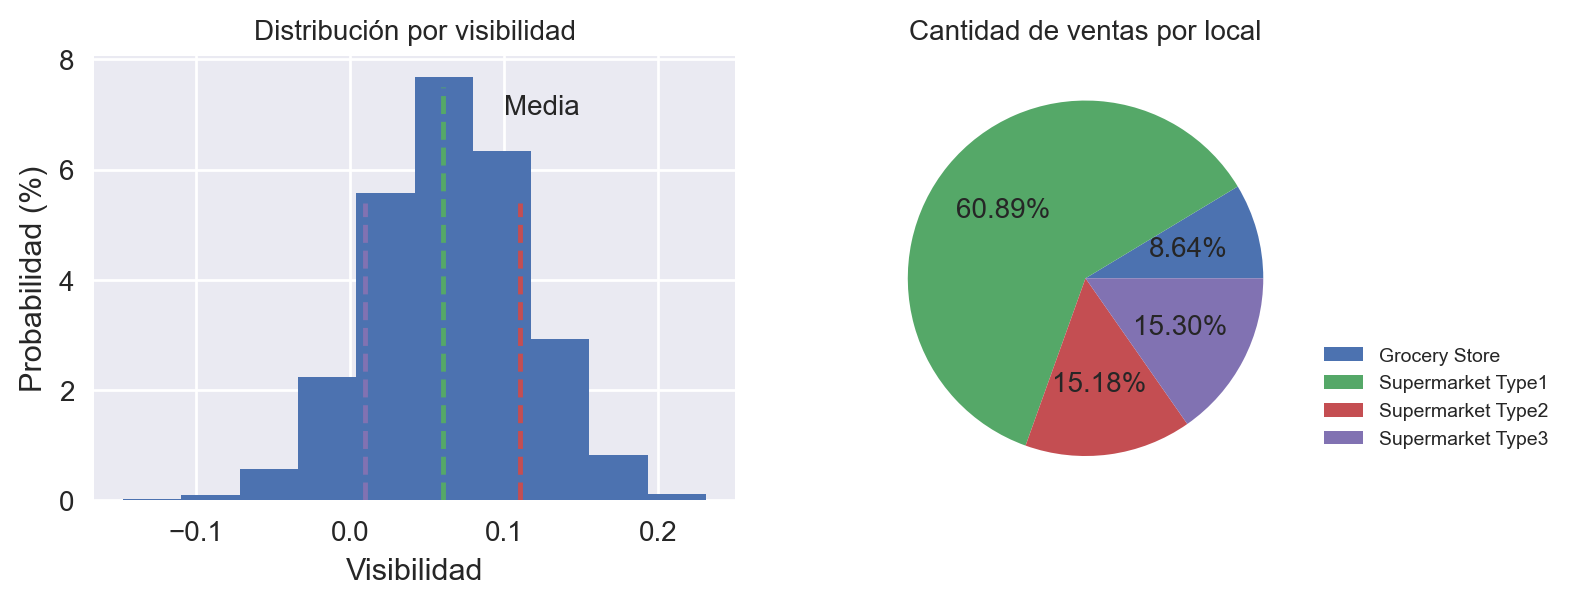

In [120]:
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
plt.style.use('seaborn')
ax1 = fig.add_subplot(2,2,1)
ax1.hist(x,num_bins,density=True)
ax1.set_xlabel('Visibilidad')
ax1.set_ylabel('Probabilidad (%)')
ax1.plot([0.06,0.06],[0,7.5],'--')
ax1.plot([0.06+desv_vis,0.06+desv_vis],[0,5.4],"--")
ax1.plot([0.06-desv_vis,0.06-desv_vis],[0,5.4],"--")
ax1.annotate('Media', xy=(0.06,7.5), xytext=(0.1,7))
ax1.set_title('Distribución por visibilidad',fontsize=10)


ax2=fig.add_subplot(2,2,2)
ax2.pie(Ventas_porlocal.values,autopct="%.2f%%")
ax2.legend(Ventas_porlocal.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Cantidad de ventas por local',fontsize=10)
fig.tight_layout()


Aqui se puede apreciar que la probabilidad de que en la poblacion total de productos, el 60% de esta su probabilidad de visibilidad está dentro de un 0 a un 10%. 
Mientras que en cuanto al nivel de venta de un producto, el que reporta más ventas por producto vendido es el tipo de local de supermarket Type 1, llegando a casí un 61% del total de todos los productos vendidos. 

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


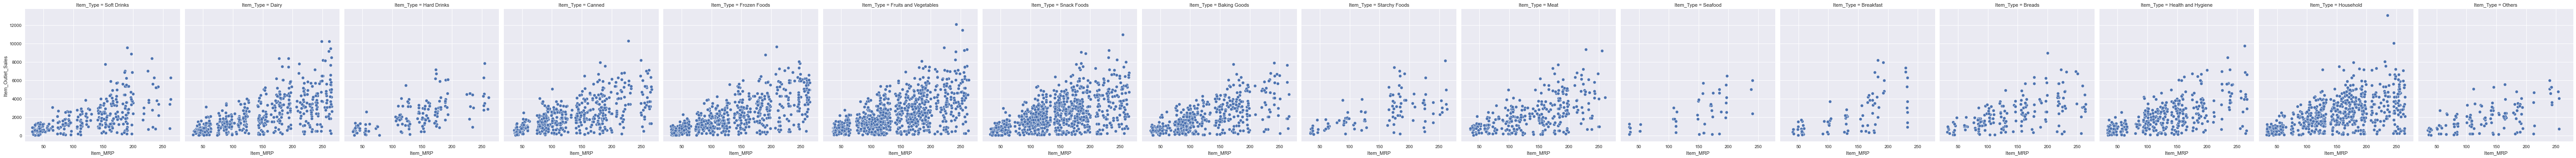

In [133]:

sns.relplot(data=predicciones_without_nan,x='Item_MRP',y='Item_Outlet_Sales',col='Item_Type')


aquí podemos apreciar que entre menor sea el precio unitario a minorista, este presenta una clara concentración de ventas que si fuese un mayor. En casi todos los tipos de productos esto se cumple con excepcion a algunos donde hay ventas pero son muy pequeñas.